# Dispersion in refractive index

In this notebook, we visualize how the refractive index of Platinum varies with the wavelength of photon. This variation is called dispersion. Characteristic features include

- the general decreasing trend of $\delta$ and $\beta$ with the energy, that respectively suggest that medium behaves nearly as a vacuum for higher energy photons. This is termed **normal dispersion**.
- the real part of the refractive index is slightly less than 1 for photons more energetic than visible photons.
- Spikes in the imaginary part of the refractive index at characteristic energies that correspond to the lines of absorption for the material. This is termed **anomalous dispersion**.
- As we work with metallic ultra-thin films, we shall study the dispersion of refractive in Pt as a representative of metals. Data is sourced from the [atomic scattering files](https://henke.lbl.gov/optical_constants/asf.html) of the Centre for X-ray Optics from Berkeley Lab.
- To explain these features of dispersion in refractive index, we model the material as a collection of classical Lorentz oscillators with a dispersion in the density of these oscillators. The dispersion behaviour is also understood from a quantum mechanical counterpart of this theory.  

In [5]:
import numpy as np
from scipy.constants import pi, Avogadro, physical_constants
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('../../../myMatplotlibStylesheet.mplstyle')

In [6]:
from scipy.constants import h, c, e

In [7]:
print(h*c/e)

1.2398419843320026e-06


In [9]:
#%% Constants
energy_CuKa = 8.051e3    # energy of photon corresponding to 1.54 Å.

z_pt, m_pt = 78, 195.078 # Atomic number and atomic weight of Pt.
rho_pt = 2.15e+4  # density in kg per m^3

r_e = physical_constants['classical electron radius'][0]          # classical radius of electron (in m)


In [10]:
lambda_xrr = h*c/e/ energy_CuKa   # wavelength of photon used for XRR measurement (in m).

In [11]:
lambda_xrr

1.539985075558319e-10

## My TeX \newcommands

{% comment %} 

$$
\newcommand{\myScaSub}[2]{{#1}_\mathrm{#2}}
$$

$$
\newcommand{\myVec}[1]{\mathbf{ { \mathrm{#1} } } }
$$

{% endcomment %} 


## Classical theory of refractive index

We consider the interaction of light with matter in a simple model of an electron tied to the nucleus using a spring-like force with a spring constant $k$ and an associated damping characterized by the damping factor $\eta$. The force due to the electric field of light acts only upon the electron. The mechanics of the nucleus can be neglected owing to its larger mass.
The governing equation of motion is

$$
F_{drive} - kx - m \eta \dot{x} = m \ddot{x}
$$

Rewriting the spring constant in terms of the natural frequency of the oscillator $\omega_0$ given by

$$
k = m \omega_0^2
$$

we have

$$
F_{drive} - m \omega_0^2 x - m \eta \dot{x} = m \ddot{x}
$$

Consider a photon with frequency $\omega$ incident on this simple atom. The associated harmonic driving force is given by

$$
F_{drive} = - e E(t) = - e E_{0} e^{i \omega t}
$$

This force drives the electron, whose relative displacement $\delta x$ from the mean position can also be assumed to be of frequency within the linear response approximation so that

$$
\delta x = x_{0} e^{i \omega t}
$$

Substituting the harmonic expressions for the relative displacement and the force gives


$$
x_{0}(\omega) = - \frac{e E_{0}(\omega)}{m} \frac{1}{ \omega_0^2 - \omega^2 + \iota \eta \omega}
$$

This displacement gives rise to a dipole moment with the same frequency given by

$$
\myScaSub{\mu}{e} = -e x_{0}(\omega),
$$

so that if the number density of electrons is $N$, then the polarization, the total dipole moment per unit volume is given by

$$
P(\omega) = N \myScaSub{\mu}{e} = - N ex_{0}(\omega)
$$

This polarization can be expressed as linear response to the applied electric field with constant of proportionality, the susceptibility $\chi$ given by

$$
P(\omega) = \myScaSub{\epsilon}{0} \chi (\omega) E_{0}(\omega),
$$

so that

$$
\chi (\omega) = \frac{N e^2 }{\myScaSub{m \epsilon}{0}} \frac{1}{\omega_0^2 - \omega^2 + \iota \eta \omega}
$$

### Relative permitivity

Now this polarization leads to difference in the electric field $\myVec{E}$ and the displacement $\myVec{D}$ given by the Maxwell's equation

$$
\myVec{D} = \myScaSub{\epsilon}{0}\myVec{E} + \myVec{P}
$$

As a result, the response of a dielectric medium is polarization. This effect is experimentally measured in terms of relative permitivity $\myScaSub{\epsilon}{r}$ given by

$$
\myVec{D} = \myScaSub{\epsilon}{r}\myScaSub{\epsilon}{0}\myVec{E},
$$

so that

$$
\myScaSub{\epsilon}{r}(\omega) = 1 + \chi (\omega) 
$$

If we define the plasma frequency $\myScaSub{\omega}{p}$ as

$$
\myScaSub{\omega}{p}^2 = \frac{N e^2 }{\myScaSub{m \epsilon}{0}},
$$

then

$$
\myScaSub{\epsilon}{r}(\omega) = 1 + \frac{\myScaSub{\omega}{p}^2}{\omega^2 - \omega_0^2 + \iota \eta \omega}
$$

> This important equation says that relativity permitivity depends on the frequency of the field as well as the material's plasma frequency and damping factor.

### Estimate of relative permitivity

Using the typical values of [plasma frequency](../basics/optical_properties_of_metals.ipynb#Estimate-of-plasma-frequency), [damping factor](../basics/optical_properties_of_metals.ipynb#Estimate-of-damping-factor), and $\omega_0 = 0$ for metals, we have

$$
\myScaSub{\omega}{p} \sim 3 \,\mathrm{PHz},
$$

$$
\eta \sim 0.1 \myScaSub{\omega}{p},
$$

so that

$$
\myScaSub{\epsilon}{r} = 1 + \frac{\myScaSub{\omega}{p}^2}{- \omega^2  + \iota \eta \omega}
$$

If we resolve this complex quantity into real and imaginary components as

$$
\myScaSub{\epsilon}{r} = \myScaSub{\epsilon}{real}  + \iota \myScaSub{\epsilon}{imag},
$$

where

$$
\myScaSub{\epsilon}{real} = 1 - \frac{\myScaSub{\omega}{p}^2}{\omega^2  + \eta^2},
$$

and

$$
\myScaSub{\epsilon}{imag} = -  \frac{\myScaSub{\omega}{p}^2}{\omega}\frac{\eta}{\omega^2  + \eta^2}.
$$

In the special case of X-rays, for a wavelength of $1.54 \,\mathrm{A}^\circ$, the frequency is

nearly $2000 \, \mathrm{PHz} \sim 650 \myScaSub{\omega}{p}$. So unless there is anomalous dispersion, we have

$$
\myScaSub{\epsilon}{real} = 1 - \frac{1}{650^2  + 0.1^2} = 1- 2.4\cdot 10^{-6},
$$

and

$$
\myScaSub{\epsilon}{imag} = -  \frac{1}{650}\frac{0.1}{650^2  + 0.1^2} = -3.6\cdot 10^{-10}.
$$

In [14]:
# Frequency of X-rays in PHz

f_xrays = c/lambda_xrr/1e+15

In [15]:
f_xrays

1946.7231388025675

In [16]:
# Frequency of X-rays in units of w_p
w_p = 3
f_xrays/3

648.9077129341891

In [17]:
1/(650**2 + 0.1**2)

2.3668638493049977e-06

In [18]:
1/650*0.1/(650**2 + 0.1**2)

3.6413289989307657e-10

### Refractive index



### Case: No damping

In the case of no damping, $\eta = 0$, then the amplitude of displacement is purely real. So that the the actual displacement of electron is oscillatory. For illustration let us consider practical values of $eE_0 = 1$~eV/nm 

## Quantum theory of refractive index

Reference: Paratt Phys Rev [1954]

The quantum theory of radiation accounts for the dispersion of the atomic scattering factors, by assuming a distribution of "dispersion" oscillators. The number of oscillators $\mathrm{d}g$ within a window of $\omega$ and $\omega + \mathrm{d}\omega$ is 

$$
\mathrm{d}g = \Gamma(\omega) \mathrm{d}\omega.
$$

The response of the medium is then governed by the effective number $g$ of oscillators in the vicinity of the radiation, also called the **oscillator strength**. If we know the oscillator density, we can have a fair idea about the optical response of the medium. Now this density is related to the photo electric absorption coefficient $\mu $ by

$$
\Gamma(\omega) = \frac{m_e c}{2 \pi^2 e^2} \mu (\omega),
$$

so that if we know the dispersion of the photo-electric coefficient, we know the optical response of the medium.


Here we make an **assumption** that the dispersion of the photo-electric coefficient follows a power law. Further, we invoke the **quantum nature** of the interaction that forbids absorption of radiation with frequencies smaller than the characteristic frequency $\omega_q$ of the electrons. This is due to the quantization of the electronic motion around the nucleus in the form of shells. If we denote the characteristic frequency of the $q^\mathrm{th}$ shell of atom by $\omega_q$, then

$$
\mu (\omega) = \left(\frac{\omega_q}{\omega}\right)^{p_q} \mu_q \quad (\omega \geq \omega_q)
$$

where $p_q$ is the exponent of the power law distribution of the oscillators and is typically taken to be 3 for calculation purposes. However, it has different values for different shells as


\begin{array}{ll}
K & \frac{11}{4} \\
L & \frac{7}{3}  \\
M & \frac{5}{2}
\end{array}

In [32]:
#%% Extract the data
raw_data_pt = 'pt.nff'     # atomic scattering factors
data = np.loadtxt(raw_data_pt, skiprows=1, unpack=True)

In [33]:
energies = data[0]
f1s = data[1]
f2s = data[2]

## Anomalous dispersion

The normal dispersion monotonically increases with the energy of the photon. However, in the **left** neighbourhood vicinity of the characteristic frequencies associated with the absorption of photon by the inner electronic shells, there is a decrease of the dispersion with the energy, also called **anomalous** dispersion.

For Pt, the characteristic frequencies of photon absorption correspond to the ejection of electrons from the inner K, L, M shells and are given by

\begin{array}{ll}
\mathrm{line} & eV \\
K_1 & 78394.8 \\
L_1 & 13880.7 \\
L_2 & 13271.9 \\
L_3 & 11562.8 \\
M_1 & 3296.0  \\
M_2 & 3026.5 \\
M_3 & 2645.4 \\
M_4 & 2201.9 \\
M_5 & 2121.6 \\
N_1 & 725.4  \\
N_2 & 609.1  \\
N_3 & 519.4  \\
N_4 & 331.6  \\
N_5 & 314.6  \\
N_6 & 74.5   \\
N_7 & 71.2   \\
O_1 & 101.7  \\
O_2 & 65.3   \\
O_3 & 51.7   \\
\end{array}

In [118]:
lines = [
            [r'$K_1$',
             r'$L_1$', r'$L_2$', r'$L_3$',
             r'$M_1$', r'$M_2$', r'$M_3$', r'$M_4$', r'$M_5$',
             r'$N_1$', r'$N_2$', r'$N_3$', r'$N_4$', r'$N_5$', r'$N_6$', r'$N_7$',
             r'$O_1$', r'$O_2$', r'$O_3$'],
            [78394.8,
             13880.7, 13271.9, 11562.8,
             3296, 3026.5, 2645.4, 2201.9, 2121.6,
             725.4, 609.1, 519.4, 331.6, 314.6, 74.5, 71.2,
             101.7, 65.3, 51.7
            ]
        ]

In [119]:
f1s[np.argmin((energies - lines[1][1])**2)]

68.8083

Text(0, 0.5, '$f_1, f_2$')

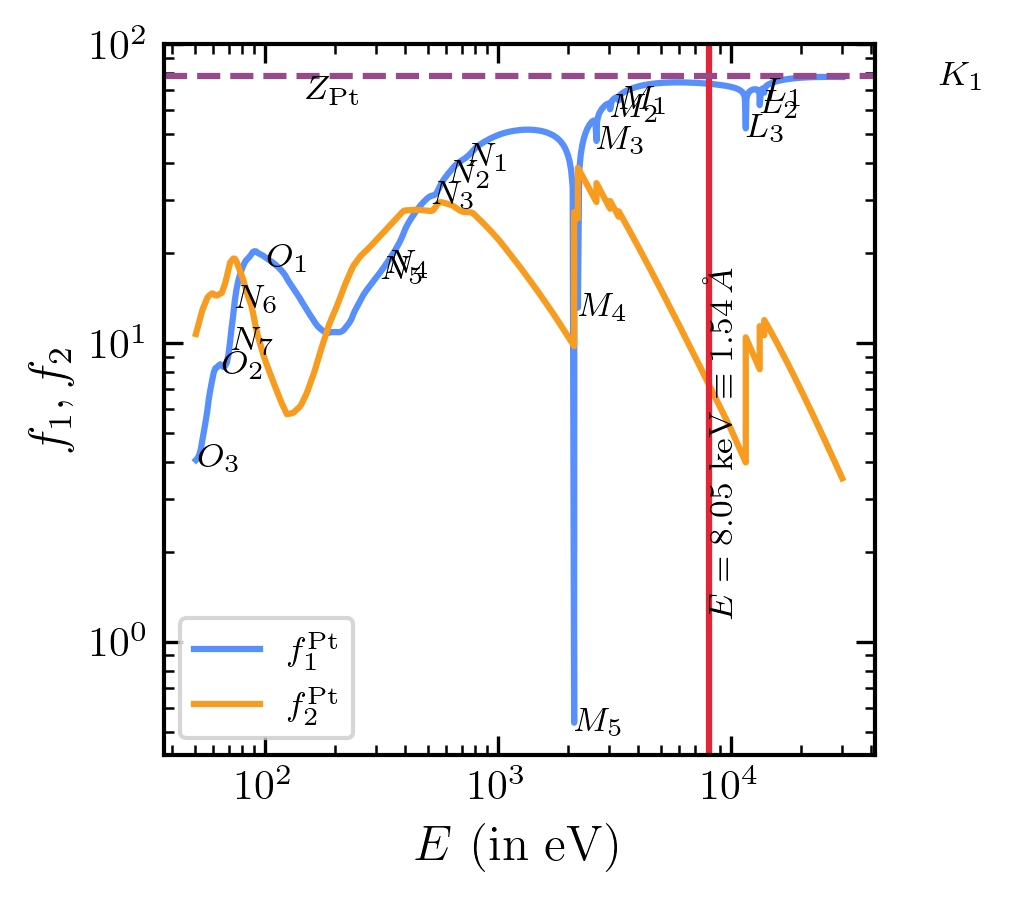

In [128]:
#%% Plot the dispersion of scattering factor with energy.

fig, ax = plt.subplots()

x_min = 5e+1
ax.plot(energies[energies > x_min], f1s[energies > x_min], '-', label=r'$f_1^\mathrm{Pt}$')
ax.plot(energies[energies> x_min], f2s[energies> x_min], '-', label=r'$f_2^\mathrm{Pt}$')

ax.axvline(energy_CuKa, color='C2')
ax.text(energy_CuKa, 0.2, r'$E=8.05$ keV $\equiv 1.54\,\r{A}$ ', transform=ax.get_xaxis_transform(),
        rotation='vertical')

ax.axhline(z_pt, color='C3', ls = '--')
ax.text(0.2, z_pt, r'$Z_\mathrm{Pt}$ ', transform=ax.get_yaxis_transform(),
        va='top', rotation='horizontal')

# Annotate the anomalous dispersion peaks.
#line_energy = lines[1][1]
#line_name = lines[0][1]
#ax.text(line_energy, f1s[np.argmin((energies - lines[1][1])**2)], line_name,
#        #transform=ax.get_xaxis_transform(),
#        va='top', rotation='horizontal')

for line_name, line_energy in zip (lines[0], lines[1]):
    ax.text(line_energy, f1s[np.argmin((energies - line_energy)**2)], line_name,
            #transform=ax.get_xaxis_transform(),
            va='center', rotation='horizontal')


ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

# Set the ticks in log scale.
major_ticks = mpl.ticker.LogLocator(base=10.0)
minor_ticks = mpl.ticker.LogLocator(base=10.0, subs=np.arange(1, 10), numticks=10)

#ax.xaxis.set_major_locator(major_ticks)
#ax.xaxis.set_minor_locator(minor_ticks)
#ax.yaxis.set_major_locator(major_ticks)
#ax.yaxis.set_minor_locator(minor_ticks)

ax.set_xlabel(r'$E$ (in eV)')
ax.set_ylabel(r'$f_1, f_2$')


In [122]:
fig.savefig('dispersion_scattering_factor_Pt.png')
fig.savefig('dispersion_scattering_factor_Pt.pdf')

In [90]:
# Get the lambdas from energies.

lambdas = np.array([h*c/e/ energy for energy in energies])

Text(0, 0.5, '$f_1, f_2$')

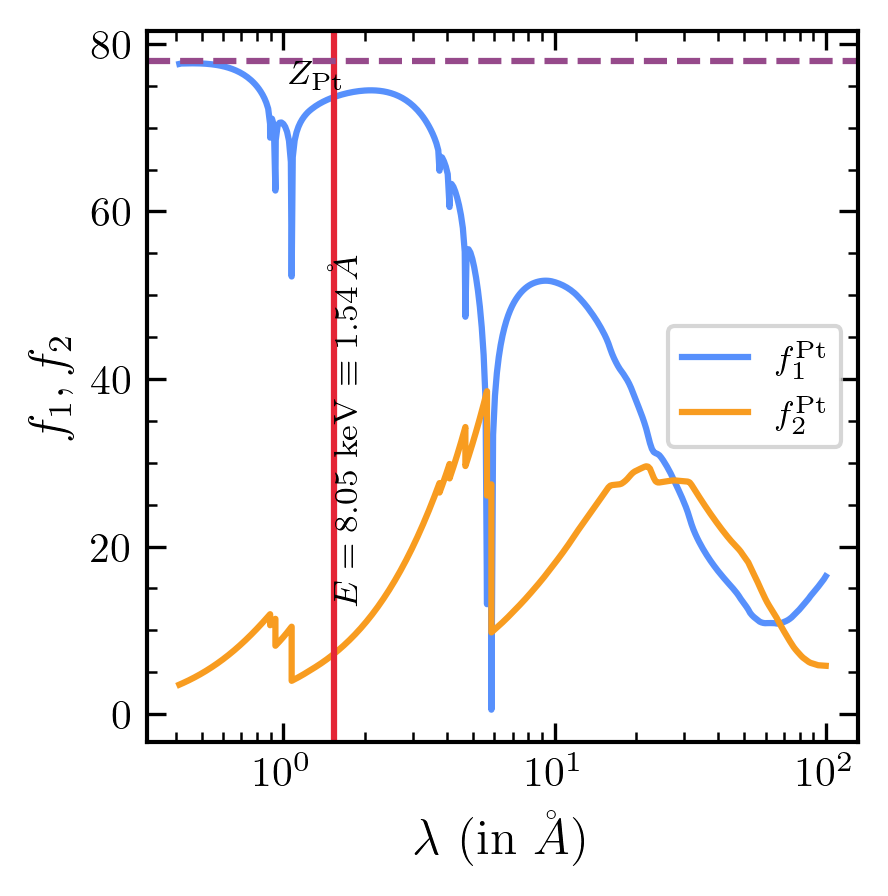

In [99]:
#%% Plot the dispersion of scattering factor with wavelength.

fig, ax = plt.subplots()

lambda_max = 1e-8
ax.plot(lambdas[lambdas < lambda_max]/1e-10, f1s[lambdas < lambda_max], '-', label=r'$f_1^\mathrm{Pt}$')
ax.plot(lambdas[lambdas < lambda_max]/1e-10, f2s[lambdas < lambda_max], '-', label=r'$f_2^\mathrm{Pt}$')

ax.axvline(lambda_xrr/1e-10, color='C2')
ax.text(lambda_xrr/1e-10, 0.2, r'$E=8.05$ keV $\equiv 1.54\,\r{A}$ ', transform=ax.get_xaxis_transform(),
        rotation='vertical')

ax.axhline(z_pt, color='C3', ls = '--')
ax.text(0.2, z_pt, r'$Z_\mathrm{Pt}$ ', transform=ax.get_yaxis_transform(),
        va='top', rotation='horizontal')

ax.legend()
ax.set_xscale('log')
#ax.set_yscale('log')

# Set the ticks in log scale.
major_ticks = mpl.ticker.LogLocator(base=10.0)
minor_ticks = mpl.ticker.LogLocator(base=10.0, subs=np.arange(1, 10), numticks=10)

#ax.xaxis.set_major_locator(major_ticks)
#ax.xaxis.set_minor_locator(minor_ticks)
#ax.yaxis.set_major_locator(major_ticks)
#ax.yaxis.set_minor_locator(minor_ticks)

ax.set_xlabel(r'$\lambda$ (in $\r{A}$)')
ax.set_ylabel(r'$f_1, f_2$')


## Convert atomic scattering factor into refractive index

Using the relation

$$
\delta + \iota \beta =  \frac{r_e \lambda^2 N_A}{2\pi M_a}  \rho  \left( f_1 + \iota f_2 \right)
$$

where $\myScaSub{M}{a}$ is the atomic mass, $\rho$ is the density of material in \si{\gram\per\centi\metre\cubed}, $\myScaSub{r}{e} = 2.818\, \mathrm{nm}$ is the classical radius of electron, $\lambda=$ 1.54 Å is the wavelength of photon. This gives a relation between the atomic scattering factors, the density and the refractive index as

$$
\delta + \iota \beta =  6.406 \cdot 10^{-6}  \rho \frac{  f_1 + \iota f_2 }{M_a}
$$



### Relation between energy and wavelength of photon

$$
E \, \mathrm{ (in eV)} = \frac{1.24}{\lambda \, \mathrm{ (in mum)}}
$$

## Relation between refractive index and the scatering factor

Reference: Paratt, Phys Rev[1954]

As per the quantum theory of radiation, the refractive index for X-rays is given as

$$
n = 1 - (\delta + \iota \beta)
$$

where $\delta$ for a medium containing different atomic species $s$ is

$$
\delta = \sum_{s} \delta_{s},
$$

where

$$
\delta_{s} = \sum_{s} A_{s} \lambda^2 f_1,
$$

where $f_1$ is the atomic scattering factor and

$$
A_{s} = \frac{N_A r_e}{2\pi} \frac{\rho_{s}}{M_{s}}\cdot 10^{3}, 
$$

is the prefactor corresponding to the material, where $N_A$ is the Avogadro number, $r_e = e^2/m_e c^2 = 2.8 \cdot 10^{-15}\, \mathrm{m}$ is the classical electron radius, $\rho_s, M_s$ are the density in $\mathrm{kg/m}^3$ and atomic mass in $\mathrm{Da}$ of the species $s$ 
for very small scattering angle (close to zero), where $f_1$ is the atomic scattering factor.

In [36]:
# Estimate the refractive index from atomic scattering factors.

a_s = Avogadro * r_e /(2*pi) * rho_pt / m_pt * 1e+3

In [37]:
a_s/1e+13

2.9766857718838953

The prefactor $A_{s} \sim 3\cdot10^{13}\, \mathrm{m}^{-2}$ so that for X-ray from $K_\alpha^\mathrm{Cu}=1.54 A^{\!0}$, the refractive index in terms of atomic scattering factor $f_1= 73.66 + \iota 7.2356$ as 

In [38]:
f1_pt, f2_pt = 73.66, 7.232
delta_pt, beta_pt = [a_s  * lambda_xrr**2 * f_pt for f_pt in [f1_pt, f2_pt]]

In [39]:
delta_pt, beta_pt

(5.1999327869637284e-05, 5.105337213592409e-06)

## $\delta$'s and $\beta$'s from scattering factors

As seen above there is a $\lambda^2$ prefactor in the dependence of $\delta$ on the scattering factor $f_1$. 

In [74]:
deltas = np.array([a_s * lamb**2 * f1 for lamb, f1  in zip(lambdas, f1s)])
betas = np.array([a_s * lamb**2 * f2 for lamb, f2  in zip(lambdas, f2s)])

In [67]:
deltas

array([-4.57532804e+03, -4.43087500e+03, -4.29091177e+03, -4.15541702e+03,
       -4.02420143e+03, -3.89708929e+03, -3.77398584e+03, -3.65485996e+03,
       -3.53941808e+03, -3.42763919e+03, -3.31937600e+03, -3.21454499e+03,
       -3.11306148e+03, -3.01474216e+03, -2.91951500e+03, -2.82735103e+03,
       -2.73804246e+03, -2.65156678e+03, -2.56785395e+03, -2.48675997e+03,
       -2.40822419e+03, -2.33215164e+03, -2.25851633e+03, -2.18719472e+03,
       -2.11810321e+03, -2.05121783e+03, -1.98645616e+03, -1.92371548e+03,
       -1.86297336e+03, -1.80413408e+03, -1.74715327e+03, -1.69198589e+03,
       -1.63854714e+03, -1.58679670e+03, -1.53669358e+03, -1.48816239e+03,
       -1.44116623e+03, -1.39565220e+03, -1.35156992e+03, -1.30889936e+03,
       -1.26756400e+03, -1.22753288e+03, -1.18876242e+03, -1.15122247e+03,
       -1.11486050e+03, -1.07965932e+03, -1.04555938e+03, -1.01254470e+03,
       -9.80569870e+02, -9.49601336e+02, -9.19615113e+02, -8.90571179e+02,
       -8.62447237e+02, -

Text(0, 0.5, '$n(E)= 1 - \\delta(E) + i \\beta(E)$')

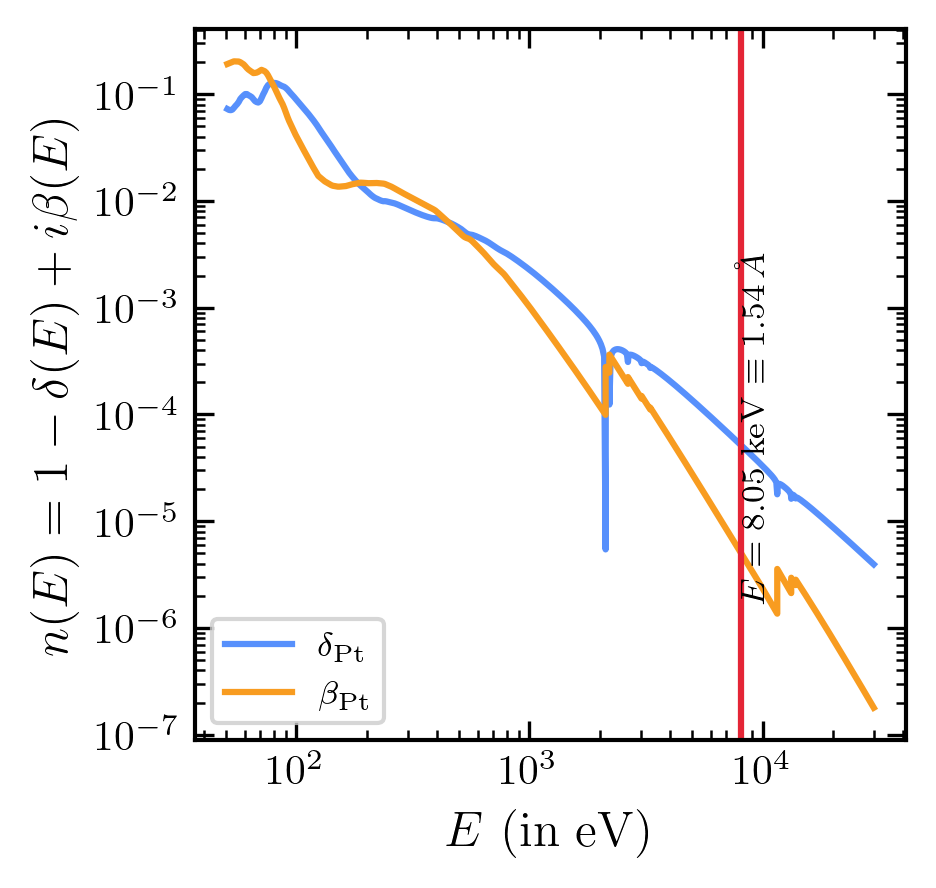

In [126]:
#%% Plot the data.

fig, ax = plt.subplots()

x_min = 5e+1
ax.plot(energies[energies > x_min], deltas[energies > x_min], '-', label=r'$\delta_\mathrm{Pt}$')
ax.plot(energies[energies> x_min], betas[energies> x_min], '-', label=r'$\beta_\mathrm{Pt}$')

ax.axvline(energy_CuKa, color='C2')
ax.text(energy_CuKa, 0.2, r'$E=8.05$ keV $\equiv 1.54\,\r{A}$ ', transform=ax.get_xaxis_transform(),
        rotation='vertical')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

# Set the ticks in log scale.
major_ticks = mpl.ticker.LogLocator(base=10.0)
minor_ticks = mpl.ticker.LogLocator(base=10.0, subs=np.arange(1, 10), numticks=10)

#ax.xaxis.set_major_locator(major_ticks)
#ax.xaxis.set_minor_locator(minor_ticks)
ax.yaxis.set_major_locator(major_ticks)
ax.yaxis.set_minor_locator(minor_ticks)

ax.set_xlabel(r'$E$ (in eV)')
ax.set_ylabel(r'$n(E)= 1 - \delta(E) + i \beta(E)$')

In [127]:
fig.savefig('dispersion_refractive_index_Pt.png')
fig.savefig('dispersion_refractive_index_Pt.pdf')

In [25]:
from scipy.constants import epsilon_0

In [26]:
epsilon_0

8.8541878128e-12

## Direct plotting of refractive indices 

CXRO also provides database of the refractive indices.

Let us plot them.

In [149]:
raw_data_n = 'raw_data_refractive_index_Pt.txt'

In [150]:
#%% Extract the data
data_n = np.loadtxt(raw_data_n, skiprows=2, unpack=True)
print(data.shape)

(3, 516)


In [151]:
energies = data_n[0]
deltas = data_n[1]
betas = data_n[2]

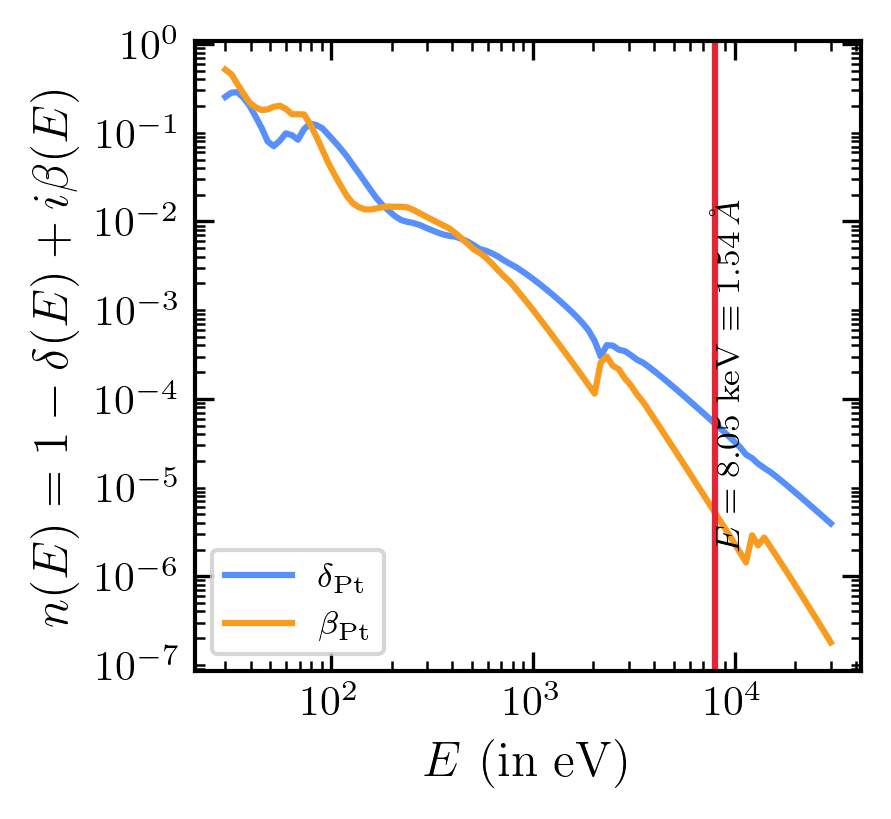

In [165]:
#%% Plotc the data.

fig, ax = plt.subplots()

ax.plot(energies, deltas, '-', label=r'$\delta_\mathrm{Pt}$')
ax.plot(energies, betas, '-', label=r'$\beta_\mathrm{Pt}$')

ax.axvline(energy_CuKa, color='C2')
ax.text(energy_CuKa, 0.2, r'$E=8.05$ keV $\equiv 1.54\,\r{A}$ ', transform=ax.get_xaxis_transform(),
        rotation='vertical')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

# Set the ticks in log scale.
major_ticks = mpl.ticker.LogLocator(base=10.0)
minor_ticks = mpl.ticker.LogLocator(base=10.0, subs=np.arange(1, 10), numticks=10)

#ax.xaxis.set_major_locator(major_ticks)
#ax.xaxis.set_minor_locator(minor_ticks)
ax.yaxis.set_major_locator(major_ticks)
ax.yaxis.set_minor_locator(minor_ticks)

ax.set_xlabel(r'$E$ (in eV)')
ax.set_ylabel(r'$n(E)= 1 - \delta(E) + i \beta(E)$')
fig.subplots_adjust(left=0.25, top=0.9)
#ax.set_title(r'Material(Pt)')

In [166]:
fig.savefig('refractive_index_Pt.png')
fig.savefig('refractive_index_Pt.pdf')

## Comparison of refractive indices of Co and Pt

Let us compare the refractive indices of different metals.

In [167]:
raw_datas = [
                'raw_data_refractive_index_Ta.txt',
                'raw_data_refractive_index_Pt.txt',
                'raw_data_refractive_index_Co.txt',
                #'raw_data_refractive_index_Cu.txt',
                'raw_data_refractive_index_Fe.txt',
                'raw_data_refractive_index_B.txt'
            ]
labels = [
            r'$\delta_\mathrm{Ta}$',
            r'$\delta_\mathrm{Pt}$',
            r'$\delta_\mathrm{Co}$',
            #r'$\delta_\mathrm{Cu}$',
            r'$\delta_\mathrm{Fe}$',
            r'$\delta_\mathrm{B}$'
         ]

In [168]:
#%% Extract the data
data_n_s = [np.loadtxt(raw_data, skiprows=2, unpack=True) for raw_data in raw_datas]

In [169]:
energies = [data_n[0] for data_n in data_n_s]
deltas = [data_n[1] for data_n in data_n_s]

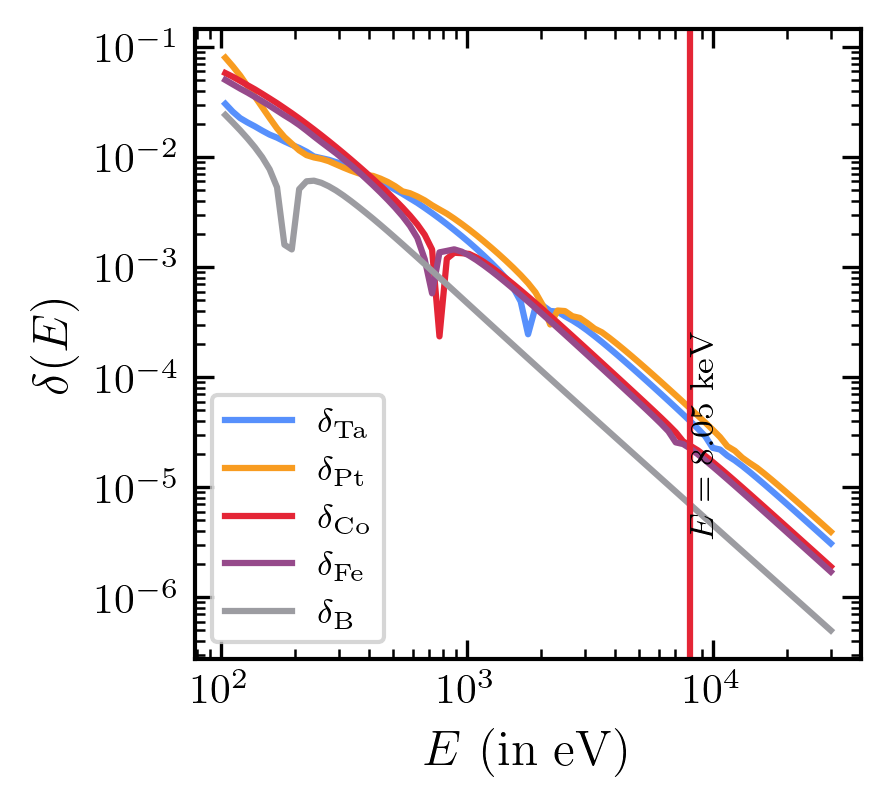

In [170]:
#%% Plot the deltas.

fig, ax = plt.subplots()

xmin = 1e+2

for energy, delta, label in zip(energies, deltas, labels):
    ax.plot(energy[energy > xmin], delta[energy > xmin], '-', label=label)

#ax.plot(energies[2], deltas[2], '-', label=labels[2])

ax.axvline(energy_CuKa, color='C2')
ax.text(energy_CuKa, 0.2, r'$E=8.05$ keV', transform=ax.get_xaxis_transform(),
        rotation='vertical')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$E$ (in eV)')
ax.set_ylabel(r'$\delta(E)$')
fig.subplots_adjust(left=0.25, top=0.9)
#ax.set_title(r'Material(Pt)')

In [171]:
fig.savefig('deltas_Ta_Pt_Co_Fe_B.png')
fig.savefig('deltas_Ta_Pt_Co_Fe_B.pdf')

### Refractive index of synthetic $Co_3FeB$

In a multi atom material, the refractive index is the weighted contributions from each of the atomic species.

Since the chemical formula of CoFeB alloy is $Co_{60}Fe_{20}B_{20}$ (at%), we have

$$
f_\mathrm{CoFeB} =  \frac{60 f_\mathrm{Co} + 20 f_\mathrm{Fe} + 20 f_\mathrm{B}}{100}, 
$$

and

$$
M_\mathrm{CoFeB} = \frac{60 M_\mathrm{Co} + 20 M_\mathrm{Fe} + 20 M_\mathrm{B}}{100}.
$$

In [144]:
raw_datas = [
                'raw_data_refractive_index_Cu.txt',
                'raw_data_refractive_index_Co.txt',
                'raw_data_refractive_index_CoFeB.txt'            ]
labels = [
            r'$\delta_\mathrm{Cu}$',
            r'$\delta_\mathrm{Co}$',
            r'$\delta_\mathrm{CoFeB}$'
         ]

In [145]:
#%% Extract the data
data_n_s = [np.loadtxt(raw_data, skiprows=2, unpack=True) for raw_data in raw_datas]

In [146]:
energies = [data_n[0] for data_n in data_n_s]
deltas = [data_n[1] for data_n in data_n_s]

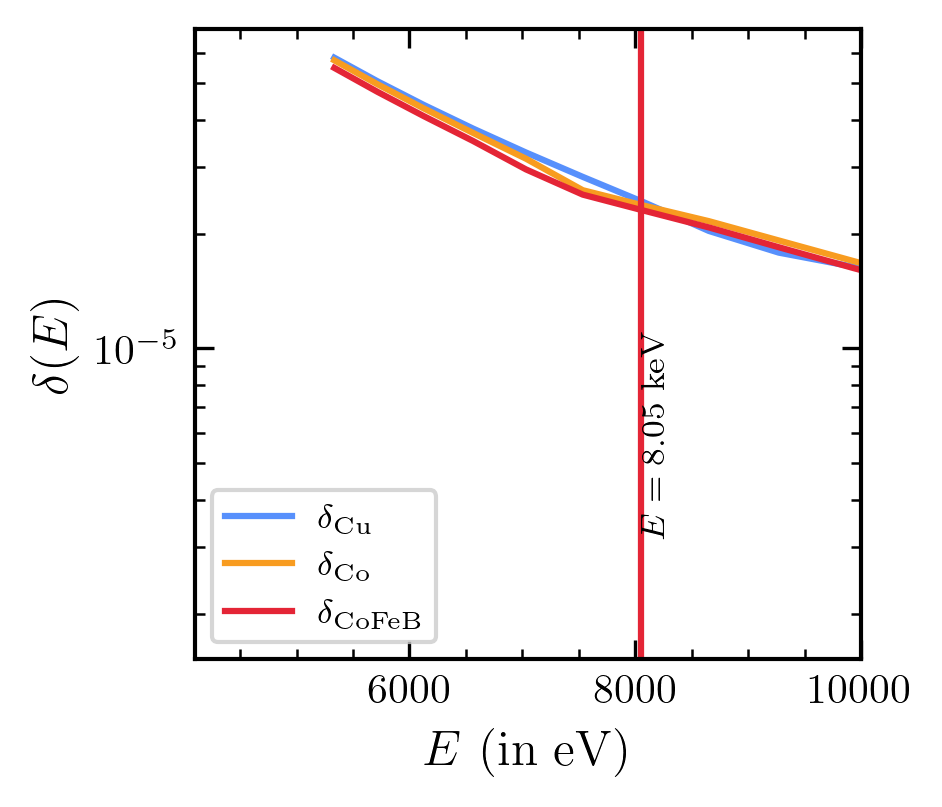

In [147]:
#%% Plot the deltas.

fig, ax = plt.subplots()

xmin = 5e+3

for energy, delta, label in zip(energies, deltas, labels):
    ax.plot(energy[energy > xmin], delta[energy > xmin], '-', label=label)

#ax.plot(energies[2], deltas[2], '-', label=labels[2])

ax.axvline(energy_CuKa, color='C2')
ax.text(energy_CuKa, 0.2, r'$E=8.05$ keV', transform=ax.get_xaxis_transform(),
        rotation='vertical')

ax.legend()
#ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(right=1e+4)
ax.set_xlabel(r'$E$ (in eV)')
ax.set_ylabel(r'$\delta(E)$')
fig.subplots_adjust(left=0.25, top=0.9)
#ax.set_title(r'Material(Pt)')

In [172]:
(60*24.6213 + 20*24.8575 + 20*5.00961)/100

20.746202000000004

In [173]:
(60*3.56198 + 20*3.20844 + 20 * 0.0040748)/100

2.7796909600000004

In [174]:
(60* 59 + 20* 56 + 20 * 11)/100

48.8

## Comparison of $\delta$ and $\rho$ of the material

Given the $\delta$ and $f_1$, let us estimate the density $\rho$ of the material.

Since

$$
\delta_\mathrm{Pt} =  A_\mathrm{Pt} \lambda^2 f_1^\mathrm{Pt},
$$

we have

$$
A_\mathrm{Pt} = \frac{\delta_\mathrm{Pt}}{\lambda^2 f_1^\mathrm{Pt}}.
$$

In [175]:
f_pt = 73.6633
d_pt = 3.8e-5

a_pt = d_pt/ lambda_xrr**2 / f_pt

In [176]:
a_pt

21751588784184.492

Since 

$$
A_\mathrm{Pt}  = \frac{N_A r_e}{2\pi} \frac{\rho_\mathrm{Pt} }{M_\mathrm{Pt} }, 
$$

we have

$$
\rho_\mathrm{Pt} =  \frac{2\pi}{N_A r_e} A_\mathrm{Pt} M_\mathrm{Pt} 
$$

In [178]:
rho_pt_estimate = 2 * pi / (Avogadro* r_e) * a_pt * m_pt

In [179]:
rho_pt_estimate

15704451.3870913

The dispersion of atomic scattering factor for atomic species $s$ extracted from the experimentally observed dispersion in refractive index is given by

$$
f_1 = \frac{\delta}{A_{s} \lambda^2}.
$$